## Tutorial 1: Evolution of a Binary System

Given a binary system with a certain mass ratio $q$, spins $\chi_1$ and $\chi_2$ at a certain separation $r$ it is possible to evolve it backward or forward in time (toward a larger separation or a smaller one) by just solving the differential equation $d\kappa/du$.
In this  tutorial we show an example of this evoltuion.

In [180]:
%matplotlib inline
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from importlib.machinery import SourceFileLoader
import matplotlib.colors as colors
import matplotlib.lines as mlines
import matplotlib.ticker

precession_circ = SourceFileLoader("precession", "/data/gfumagalli/precession/precession.py").load_module()

### intial conditions 
A compact binary is described by :
- Mass ratio: $q=m_2/m_1$ where $m_1$ and $m_2$ are the mass of the two black holes and $m_1> m_2$. 

- Spins: $S_1 =\frac{\chi_1}{(1+q)^2}$, $S_2 = \frac{q^2\chi_2}{(1+q)^2}$ with $|\chi|\in [0,1]$.

- $\chi _{eff}$: $\frac{\chi_1 \cos \theta_1+q\chi_2 \cos \theta_2}{1+q} $, where $\theta_1$ and $\theta_2$ are the angles between the spins and angular momentum.

In [212]:
#MASS RATIO
q=random.uniform(0.1,1)
#SPINS
chi1=np.random.uniform(0,1)
chi2=np.random.uniform(0,1)
S_mag=precession_circ. spinmags(q, chi1, chi2)

#CHI_EFFECTIVE: 
chieff_limits=precession_circ.chiefflimits_definition(q, chi1, chi2)
chieff=np.random.uniform(chieff_limits[0],chieff_limits[1])

print('Binary intial conditions: \n q = %.3f \n chi1 = %.3f -> S1= %.3f \n chi2 = %.3f -> S2= %.3f \
      \n chieff = %.3f in [%.3f, %.3f]'%(q,chi1,chi2,S_mag[0],S_mag[1],chieff,chieff_limits[0],chieff_limits[1]) )


Binary intial conditions: 
 q = 0.781 
 chi1 = 0.513 -> S1= 0.564 
 chi2 = 0.162 -> S2= 0.108       
 chieff = 0.071 in [-0.535, 0.535]


## Evolving from merger to infinity 
Supposing that the binary arrives at merger ($r=10$) with the characteristics described in the initial condition. It is possible to evolve the bianry backwords in time (separation) and evaluate its properties.

In [182]:
#Separation
r0=1e1
rf=1e6
r=np.geomspace(r0,rf,10000)
r[-1]=np.inf

#Kappa at initial separation (limist evaluated though resonance):
k_lim=precession_circ.kappalimits(r=r0,chieff=chieff, q=q, chi1=chi1, chi2=chi2)  
k0=random.uniform(k_lim[0],k_lim[1])

#Moprhology at initial separation:
morph = precession_circ.morphology(k0, r0, chieff, q, chi1, chi2,)
print('Kappa at separation r = %.1f: k = %.4f in [%.4f, %.4f]'
   %(r0,k0,k_min_max[0],k_min_max[1]) )
print('Morphology at separation r = %.1f:' %(r0),morph[0]) 

Kappa at separation r = 10.0: k = -0.0424 in [-0.0952, -0.0759]
Morphology at separation r = 10.0: C+


**Precession avarege inspiral**

In [183]:
output = precession_circ.inspiral_precav(kappa=k0,r=r,chieff=chieff,q=q,chi1=chi1,chi2=chi2,enforce=True)
r=output['r'][0]
u=output['u'][0]

### $\theta_1$, $\theta_2$
The angles related to the vectors reresenting the spins are $\theta_1$ and $\theta_2$. When the cosine of one of this two angles reaches 1 or -1 there is a change in the morphology.
Since $u=\frac{1}{2L} \propto r^{-1/2}$ it is possible to use the comaptified separation to trak the evoltution fo the bianry. At $r=\infty$, $u=0$. 

In [207]:
morph = precession_circ.morphology(output['kappa'][0], r, precession_circ.tiler(chieff,r), q=precession_circ.tiler(q,r), chi1=precession_circ.tiler(chi1,r), chi2=precession_circ.tiler(chi2,r) )
print('C+:',np.sum(morph=='C+'),len(r))
print('C-:',np.sum(morph=='C-'),len(r))
print('L0:',np.sum(morph=='L0'),len(r))
print('Lpi:',np.sum(morph=='Lpi'),len(r))

C+: 9999 10000
C-: 0 10000
L0: 0 10000
Lpi: 1 10000


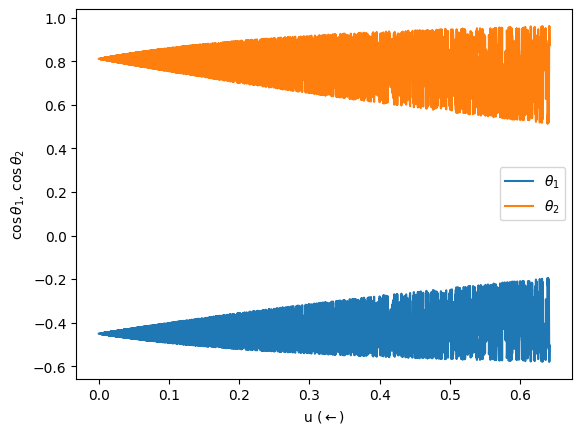

In [222]:
plt.figure()
plt.plot(u, np.cos(output['theta1'][0]),label=r'$\theta_1$')
plt.plot(u, np.cos(output['theta2'][0]),label=r'$\theta_2$')

c1=np.abs(np.cos(output['theta1'][0]))==1
if np.size(u[c1])!=0:
    for i in c1:
        plt.axvline(u[i],ls='dashed')
c2=np.abs(np.cos(output['theta2'][0]))==1
if np.size(u[c2])!=0:
    for i in c2:
        plt.axvline(u[i],ls='dashed')
plt.xlabel(r'u ($\leftarrow$)')
plt.ylabel(r'$\cos \theta_1$, $\cos \theta_2$')
plt.legend()

In [186]:
ang_res=precession_circ.anglesresonances(r=r,chieff=precession_circ.tiler(chieff,r), q=precession_circ.tiler(q,r), chi1=precession_circ.tiler(chi1,r), chi2=precession_circ.tiler(chi2,r)  )

/data/gfumagalli/precession/precession.py:923: RuntimeWarning: invalid value encountered in arccos
  theta1 = np.arccos(costheta1)


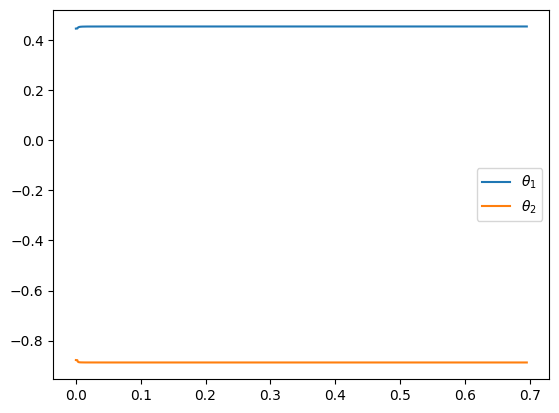

In [208]:
#plt.figure()
#plt.plot(u, np.cos(ang_res[1]),label=r'$\theta_1$')
#plt.plot(u, np.cos(ang_res[4]),label=r'$\theta_2$')
#plt.plot(u, np.cos(output['theta2'][0]),label=r'$\theta_2$')
#plt.plot(u, np.cos(output['theta1'][0]),label=r'$\theta_1$')
#plt.plot(u, np.cos(ang_res[0]),label=r'$\theta_1$')
#plt.plot(u, np.cos(ang_res[3]),label=r'$\theta_2$')
#plt.legend()

### $\kappa$


In [188]:
k_limits=precession_circ.kappalimits(r=r,chieff=precession_circ.tiler(chieff,r), q=precession_circ.tiler(q,r), chi1=precession_circ.tiler(chi1,r), chi2=precession_circ.tiler(chi2,r)  )

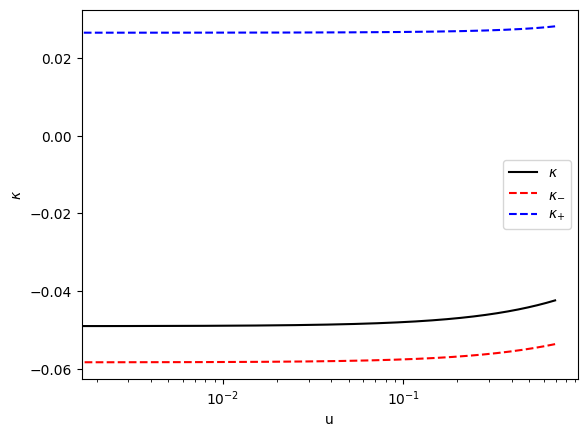

In [189]:
plt.figure()
plt.plot(u,output['kappa'][0],color='k',label=r'$\kappa$')
plt.plot(u,k_limits[0],color='r',ls='dashed',label=r'$\kappa_{-}$')
plt.plot(u,k_limits[1],color='b',ls='dashed',label=r'$\kappa_{+}$')
plt.xscale('log')
plt.xlabel(r'u ($\leftarrow$)')
plt.ylabel(r'$\kappa$')
plt.legend()

## $\delta \chi$ 

Along the inspiral

Text(0, 0.5, '$\\delta \\chi$')

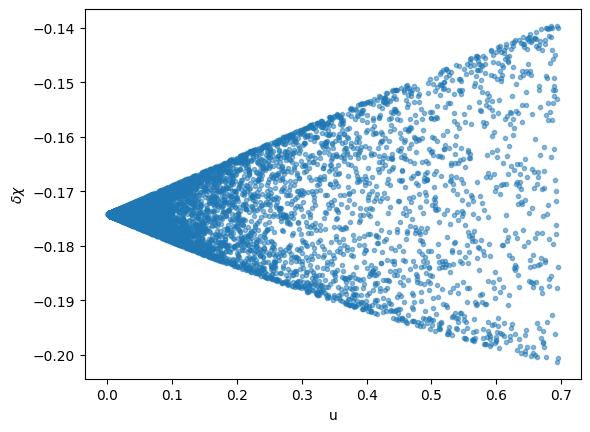

In [190]:
plt.figure()
plt.plot(u,output['deltachi'][0],'.', alpha=0.5)
#plt.xscale('log')
plt.xlabel(r'u ($\leftarrow$)')
plt.ylabel(r'$\delta \chi$')

### At the precession time scale


In [191]:
tau_precession=precession_circ.eval_tau(output['kappa'][0], r, chieff=precession_circ.tiler(chieff,r), q=precession_circ.tiler(q,r), chi1=precession_circ.tiler(chi1,r), chi2=precession_circ.tiler(chi2,r) )
tau_orbital= 2*np.pi*r**(3/2)   
tau_RR= 5*r**4*(1+q)**2/(64*q)

[3.65835519e+03 3.66925152e+03 3.68018015e+03 ... 1.38099253e+16
 1.38497397e+16            nan]


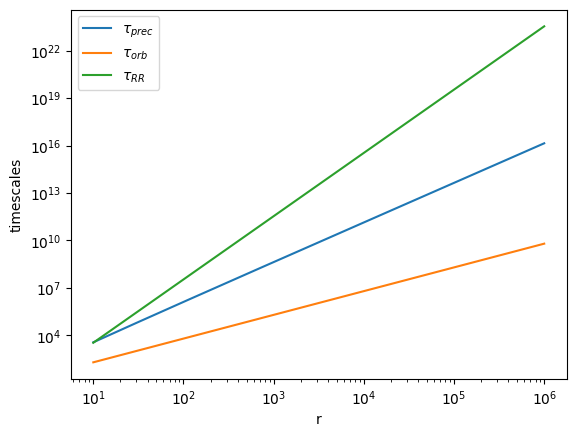

In [192]:
plt.figure()
plt.plot(r,tau_precession,label=r'$\tau_{prec}$')
plt.plot(r,tau_orbital,label=r'$\tau_{orb}$')
plt.plot(r,tau_RR,label=r'$\tau_{RR}$')
plt.legend()
plt.xlabel('r')
plt.ylabel('timescales')
plt.xscale('log')
plt.yscale('log')

Extracting a random separation $r$ during the inspiral it is possible to look at the evolution of the binary in the precession time scale. At large separation the difference between the radiation reaction timescale and the precession one is large and we can consider that the bianary at $\tau_{prec}$ with $r$ and $\kappa$ fixed.
At this timesclae $\delta \chi $ will oscillate between $\delta \chi_{+}$ and $\delta \chi_{-}$.


In [193]:
i_eval=np.random.choice(len(r))
print(r[i_eval])
tau = precession_circ.eval_tau( output['kappa'][0][i_eval], r[i_eval], chieff, q, chi1, chi2)
t = np.linspace(0,2*tau,100)
deltachi = precession_circ.deltachioft(t, output['kappa'][0][i_eval] , r[i_eval], chieff, q, chi1, chi2)
deltachi_plus,deltachi_minus= precession_circ.deltachilimits_plusminus(output['kappa'][0][i_eval] , r[i_eval], chieff, q, chi1, chi2)

11202.241486030252


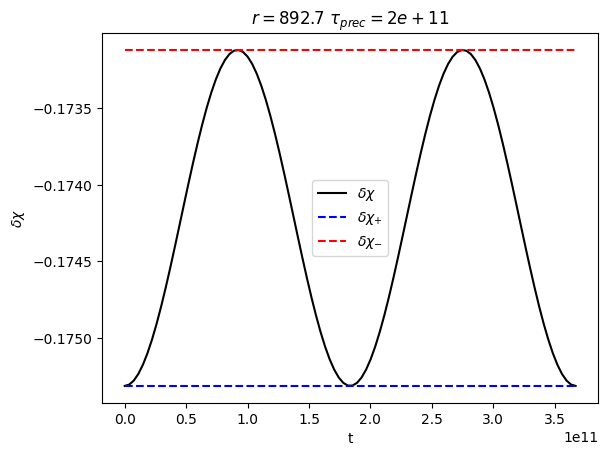

In [204]:
plt.figure()
plt.plot(t,deltachi, label='$\delta \chi $', c='k')
plt.plot(t,precession_circ.tiler(deltachi_plus[0],t.T[0]),c='b',ls='dashed' ,label='$\delta \chi_{+} $')
plt.plot(t,precession_circ.tiler(deltachi_minus[0],t.T[0]),c='r',ls='dashed', label='$\delta \chi_{-} $')
plt.title('$r= %.1f$ '%(r[i_eval])+r'$\tau_{prec}= %.e$'%(tau))
plt.xlabel('t')
plt.ylabel('$\delta \chi $')
plt.legend()

## Evolving from infinity to merger

From $r=\infty$ to $r=10$.

In [213]:
#Separation
r0=1e6
rf=1e1
r=np.geomspace(r0,rf,10000)
r[0]=np.inf
#CHI_EFFECTIVE: 
#we can use the same since it is a constant of motion.
#Kappa at initial separation
k_lim=precession_circ.kappalimits(r=r[0],chieff=chieff, q=q, chi1=chi1, chi2=chi2)  
k0=random.uniform(k_lim[0],k_lim[1]) #-> constant at infinity 
#Moprhology at initial separation:
morph = precession_circ.morphology(k0, r[0], chieff, q, chi1, chi2,)
print('Kappa at separation r = %.1f: k = %.4f in [%.4f, %.4f]'#  \n theta1 = %.3f \  \n theta2 = %.3f'
   %(r[0],k0,k_lim[0],k_lim[1]) )
print('Morphology:',morph[0])   

Kappa at separation r = inf: k = 0.0150 in [0.0093, 0.0665]
Morphology: Lpi


**Precession avarege inspiral**

In [214]:
output = precession_circ.inspiral_precav(kappa=k0,r=r,chieff=chieff,q=q,chi1=chi1,chi2=chi2,enforce=True)

In [215]:
morph = precession_circ.morphology(output['kappa'][0], r, precession_circ.tiler(chieff,r), q=precession_circ.tiler(q,r), chi1=precession_circ.tiler(chi1,r), chi2=precession_circ.tiler(chi2,r) )
print('C+:',np.sum(morph=='C+'),len(r))
print('C-:',np.sum(morph=='C-'),len(r))
print('L0:',np.sum(morph=='L0'),len(r))
print('Lpi:',np.sum(morph=='Lpi'),len(r))

C+: 9999 10000
C-: 0 10000
L0: 0 10000
Lpi: 1 10000


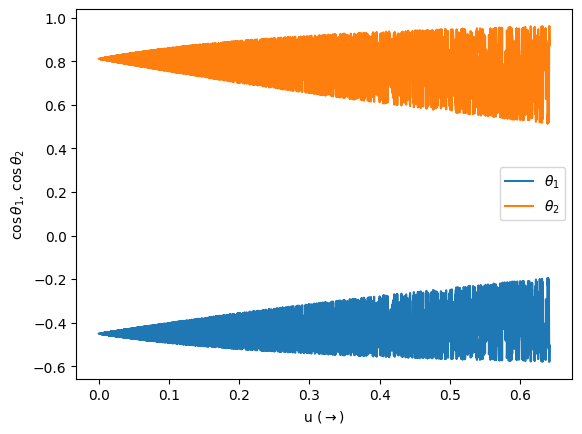

In [226]:
u=output['u'][0]
r=output['r'][0]
plt.figure()
plt.plot(u, np.cos(output['theta1'][0]),label=r'$\theta_1$')
plt.plot(u, np.cos(output['theta2'][0]),label=r'$\theta_2$')
c1=np.abs(np.cos(output['theta1'][0]))==1
if np.size(u[c1])!=0:
    for i in c1:
        plt.axvline(u[i],ls='dashed')
c2=np.abs(np.cos(output['theta2'][0]))==1
if np.size(u[c2])!=0:
    for i in c2:
        plt.axvline(u[i],ls='dashed')
plt.xlabel(r'u ($\rightarrow$)')
plt.ylabel(r'$\cos \theta_1$, $\cos \theta_2$')
plt.legend()

In [217]:
k_limits=precession_circ.kappalimits(r=r,chieff=precession_circ.tiler(chieff,r), q=precession_circ.tiler(q,r), chi1=precession_circ.tiler(chi1,r), chi2=precession_circ.tiler(chi2,r)  )

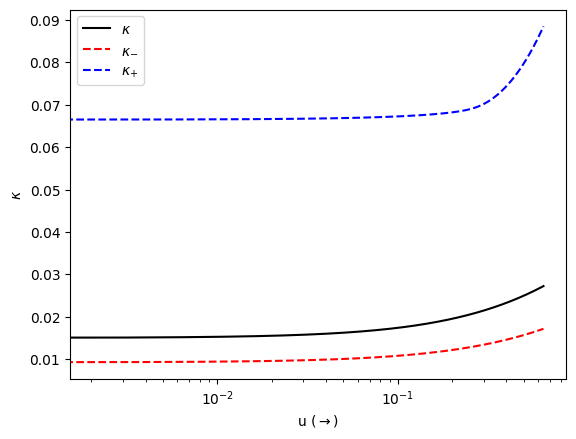

In [227]:
plt.figure()
plt.plot(u,output['kappa'][0],color='k',label=r'$\kappa$')
plt.plot(u,k_limits[0],color='r',ls='dashed',label=r'$\kappa_{-}$')
plt.plot(u,k_limits[1],color='b',ls='dashed',label=r'$\kappa_{+}$')
plt.xscale('log')
plt.xlabel(r'u ($\rightarrow$)')
plt.ylabel(r'$\kappa$')
plt.legend()

Text(0, 0.5, '$\\delta \\chi$')

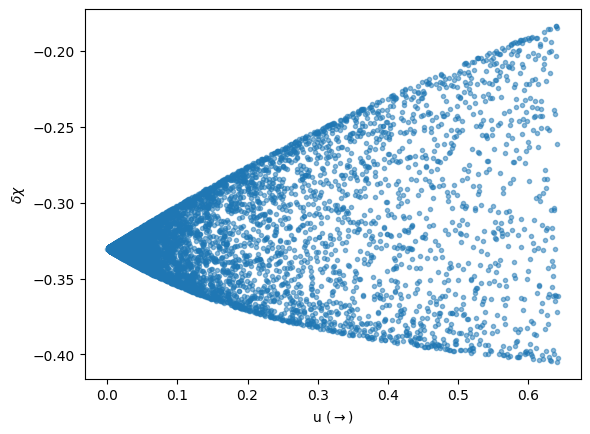

In [228]:
plt.figure()
plt.plot(u,output['deltachi'][0],'.', alpha=0.5)
#plt.xscale('log')
plt.xlabel(r'u ($\rightarrow$)')
plt.ylabel(r'$\delta \chi$')